In [398]:
import pandas as pd
import seaborn as sns
import numpy as np
import pickle

In [399]:
home_df = pd.read_csv('../data/raw/home_raw_listings.csv')
condo_df = pd.read_csv('../data/raw/condo_raw_listings.csv')
raw_df = pd.concat([home_df, condo_df], axis=0, ignore_index=True)
print(len(raw_df))

169894


In [400]:
raw_df.head()

,subtype,style,living_area,lot_dimensions,bedrooms,bathrooms,levels,location,listing_date,year_of_construction,municipal_eval,price
0,2 Storey,2 storey,1191.3,4076.29,3.0,1.0,2.0,Beauport,202012.0,2004.0,256000.0,332500.0
1,Bungalow,Open area,1261.0,9500.00,2.0,1.0,1.0,Deschambault,202112.0,1957.0,150500.0,265000.0
2,Townhouse,NaN,1645.0,1360.00,3.0,1.0,3.0,Mercier,202111.0,2006.0,479400.0,612000.0
3,Bi-generation,Link,2024.0,17000.00,4.0,3.0,1.0,Stoneham,202112.0,2019.0,NaN,526500.0
4,2 Storey,Waterfront,1469.0,16970.00,4.0,2.0,2.0,Trois-Rivières,202111.0,1925.0,NaN,NaN


In [401]:
processed_df = raw_df.copy()

In [402]:
print(len(processed_df))

169894


## Subtype

In [403]:
processed_df['subtype'].value_counts(dropna=False)

Bungalow                        48502
2 Storey                        38477
Condominium                     28902
Semi-detached                   24858
Townhouse                       10140
Bi-generation                    8006
Split Level                      4158
1 1/2 Storey                     4046
Country Home                      659
Mobile home                       611
Acreage / Hobby Farm / Ranch      531
3 Storey                          363
Manufactured home                 184
Loft                              170
Bi-Level                          161
Villa                              63
Penthouse                          41
Misc.                              14
4 Storey                            8
Name: subtype, dtype: int64

In [404]:
subtypes = processed_df['subtype'].value_counts()
processed_df = processed_df[processed_df['subtype'].isin(subtypes.keys()[0:9])]

## Style

In [405]:
processed_df['style'].value_counts(dropna=False).iloc[0:10]

NaN                     33608
2 storey                30921
Open area               25655
Detached                15325
Divided Co-Ownership    12145
Waterfront               5948
Link                     4333
Bungaloft                3948
New construction         3729
Side split               3334
Name: style, dtype: int64

In [406]:
processed_df['style'] = processed_df['style'].fillna('Unknown')
styles = processed_df['style'].value_counts()
processed_df = processed_df[processed_df['style'].isin(styles.keys())]

In [407]:
print(len(processed_df))

167748


## Living Area

In [408]:
processed_df['living_area'].value_counts(dropna=False).iloc[0:5]

960.0     5363
1800.0    4813
1560.0    4157
1645.0    3823
1267.0    3816
Name: living_area, dtype: int64

In [409]:
mean_living_area = processed_df['living_area'].dropna().mean()
processed_df['living_area'] = processed_df['living_area'].fillna(mean_living_area)

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='living_area', ylabel='Density'>

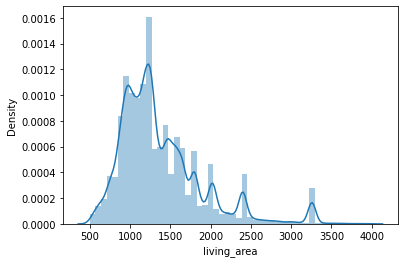

In [410]:
processed_df = processed_df[processed_df['living_area'] > 500]
processed_df = processed_df[processed_df['living_area'] < 4000]
processed_df['living_area'] = processed_df['living_area'].astype(int)

sns.distplot(processed_df['living_area'])

In [411]:
print(len(processed_df))

166594


## Lot Dimensions

In [412]:
processed_df['lot_dimensions'].value_counts(dropna=False).iloc[0:5]

NaN        23942
17000.0     3880
9500.0      3867
6000.0      3826
10100.0     3805
Name: lot_dimensions, dtype: int64

In [413]:
mean_lot_dimensions = processed_df['lot_dimensions'].dropna().mean()
processed_df['lot_dimensions'] = processed_df['lot_dimensions'].fillna(mean_lot_dimensions)

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='lot_dimensions', ylabel='Density'>

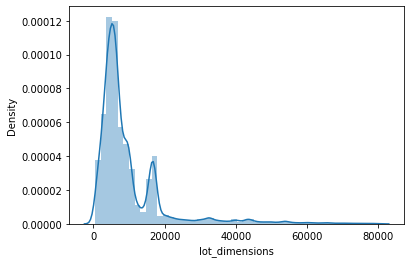

In [414]:
processed_df = processed_df[processed_df['lot_dimensions'] > 500]
processed_df = processed_df[processed_df['lot_dimensions'] < 80000]
processed_df['lot_dimensions'] = processed_df['lot_dimensions'].astype(int)

sns.distplot(processed_df['lot_dimensions'])

In [415]:
print(len(processed_df))

139329


## Bedrooms, Bathrooms & Levels

In [416]:
processed_df['bedrooms'].value_counts(dropna=False)

3.0     54214
4.0     48116
2.0     19125
5.0     15228
6.0      1129
1.0      1031
NaN       190
7.0       189
8.0        65
9.0        16
10.0       11
11.0        6
15.0        2
3.5         2
13.0        1
17.0        1
2.5         1
4.5         1
2.1         1
Name: bedrooms, dtype: int64

In [417]:
processed_df['bathrooms'].value_counts(dropna=False)

2.0       71012
1.0       61092
3.0        6929
4.0         163
NaN          96
5.0          25
6.0           6
7.0           2
8.0           2
11.0          1
2008.0        1
Name: bathrooms, dtype: int64

In [418]:
processed_df['levels'].value_counts(dropna=False)

1.0      66363
2.0      64289
3.0       6204
NaN       2141
4.0        242
6.0         36
5.0         18
8.0          8
25.0         7
7.0          7
24.0         3
9.0          3
12.0         2
15.0         2
14.0         1
768.0        1
11.0         1
23.0         1
Name: levels, dtype: int64

In [419]:
processed_df = processed_df[processed_df['bedrooms'] < 7]
processed_df = processed_df[processed_df['bathrooms'] < 5]
processed_df = processed_df[processed_df['levels'] < 4]

processed_df['bedrooms'] = processed_df['bedrooms'].astype(int)
processed_df['bathrooms'] = processed_df['bathrooms'].astype(int)
processed_df['levels'] = processed_df['levels'].astype(int)

In [420]:
print(len(processed_df))

136327


## Listing Date

In [421]:
processed_df['listing_date'].value_counts(dropna=False).iloc[0:5]

202112.0    21276
202111.0    11650
202012.0     4443
202109.0     4260
201907.0     4079
Name: listing_date, dtype: int64

In [422]:
processed_df['listing_date'] = pd.to_datetime(processed_df['listing_date'], format='%Y%m')

## Year of Construction

In [423]:
processed_df['year_of_construction'].value_counts(dropna=False).iloc[0:5]

NaN       14839
2006.0     6297
2004.0     6236
1989.0     5405
1975.0     4978
Name: year_of_construction, dtype: int64

In [424]:
mean_year_of_constructions = processed_df['year_of_construction'].dropna().mean()
processed_df['year_of_construction'] = processed_df['year_of_construction'].fillna(mean_year_of_constructions)

In [425]:
years = processed_df['year_of_construction'].value_counts()
processed_df = processed_df[processed_df['year_of_construction'].isin(years.keys())]
processed_df['year_of_construction'] = processed_df['year_of_construction'].astype(int)

In [426]:
print(len(processed_df))

136327


## Municipal Evaluation

In [427]:
processed_df['municipal_eval'].value_counts(dropna=False).iloc[0:5]

NaN         68997
256000.0     3850
150500.0     3812
209200.0     3808
251100.0     3805
Name: municipal_eval, dtype: int64

In [428]:
drop_municipal_eval = True

In [429]:
if drop_municipal_eval:
    processed_df = processed_df.drop(['municipal_eval'], axis=1)
else:
    processed_df = processed_df[processed_df['municipal_eval'] > 2000]
    processed_df = processed_df[processed_df['municipal_eval'] < 1000000]
    processed_df['municipal_eval'] = processed_df['municipal_eval'].astype(int)

    sns.distplot(processed_df['municipal_eval'])

## Price

In [430]:
processed_df['price'].value_counts(dropna=False).iloc[0:5]

NaN         25929
265000.0     4463
360000.0     4187
400000.0     4164
550000.0     3922
Name: price, dtype: int64

c:\Users\simon\Documents\GitHub\quebec-real-estate\venv\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='price', ylabel='Density'>

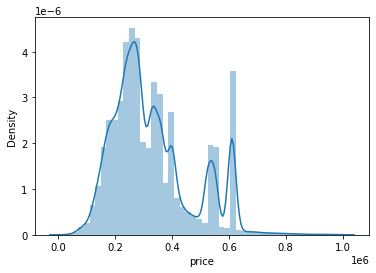

In [431]:
processed_df = processed_df[processed_df['price'] > 2000]
processed_df = processed_df[processed_df['price'] < 1000000]
processed_df['price'] = processed_df['price'].astype(int)

sns.distplot(processed_df['price'])

## Location

In [432]:
with open('../data/processed/region_mapper.pkl', 'rb') as f:
    location_mapper = pickle.load(f)

In [433]:
processed_df = processed_df.replace({'location': location_mapper})

In [434]:
processed_df['location'].value_counts().iloc[0:40]

Capitale-Nationale                          24541
Montérégie                                  14771
Laurentides                                  9840
Outaouais                                    9798
Mauricie                                     7257
Saguenay-Lac-Saint-Jean                      7018
Lanaudière                                   5620
Chaudière-Appalaches                         5137
L'Île-Bizard–Sainte-Geneviève                5095
Lachine                                      5071
Estrie                                       4448
Centre-du-Québec                             2862
Bas-Saint-Laurent                            1604
Rivière-des-Prairies–Pointe-aux-Trembles     1142
Ahuntsic-Cartierville                         901
Laval                                         880
Pierrefonds-Roxboro                           770
Mercier–Hochelaga-Maisonneuve                 680
Outremont                                     609
Montréal-Nord                                 398


In [435]:
# locations = processed_df['location'].value_counts()
# processed_df = processed_df[processed_df['location'].isin(locations.keys()[0:40])]

In [436]:
processed_df.head()

,subtype,style,living_area,lot_dimensions,bedrooms,bathrooms,levels,location,listing_date,year_of_construction,price
0,2 Storey,2 storey,1191,4076,3,1,2,Capitale-Nationale,2020-12-01,2004,332500
1,Bungalow,Open area,1261,9500,2,1,1,Mauricie,2021-12-01,1957,265000
2,Townhouse,Unknown,1645,1360,3,1,3,Lachine,2021-11-01,2006,612000
3,Bi-generation,Link,2024,17000,4,3,1,Capitale-Nationale,2021-12-01,2019,526500
5,Semi-detached,2 storey,2400,4471,4,2,2,Outaouais,2021-12-01,1989,360000


## Adding columns

In [437]:
processed_df.insert(8, 'listing_year', '')
processed_df['listing_year'] = pd.DatetimeIndex(processed_df['listing_date']).year

In [438]:
processed_df.head()

,subtype,style,living_area,lot_dimensions,bedrooms,bathrooms,levels,location,listing_year,listing_date,year_of_construction,price
0,2 Storey,2 storey,1191,4076,3,1,2,Capitale-Nationale,2020.0,2020-12-01,2004,332500
1,Bungalow,Open area,1261,9500,2,1,1,Mauricie,2021.0,2021-12-01,1957,265000
2,Townhouse,Unknown,1645,1360,3,1,3,Lachine,2021.0,2021-11-01,2006,612000
3,Bi-generation,Link,2024,17000,4,3,1,Capitale-Nationale,2021.0,2021-12-01,2019,526500
5,Semi-detached,2 storey,2400,4471,4,2,2,Outaouais,2021.0,2021-12-01,1989,360000


In [439]:
print(len(raw_df))
print(len(processed_df))

169894
110319


In [440]:
processed_df.to_csv('../data/processed/processed_listings.csv', index=False)